In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [2]:
df = pd.read_csv('sample_data/california_housing_train.csv')

In [22]:
columns = df.columns
print(columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


In [34]:
x_train = df.iloc[0:1000, 0:8].copy()
print(x_train)

     longitude  latitude  ...  households  median_income
0      -114.31     34.19  ...       472.0         1.4936
1      -114.47     34.40  ...       463.0         1.8200
2      -114.56     33.69  ...       117.0         1.6509
3      -114.57     33.64  ...       226.0         3.1917
4      -114.57     33.57  ...       262.0         1.9250
..         ...       ...  ...         ...            ...
995    -117.09     32.55  ...      1177.0         3.9583
996    -117.10     34.57  ...       724.0         3.1917
997    -117.10     34.21  ...       445.0         4.5268
998    -117.10     34.03  ...       772.0         2.5172
999    -117.10     33.56  ...       247.0         4.3833

[1000 rows x 8 columns]


In [35]:
y_train = df.iloc[:1000, 8].copy()
print(y_train)

0       66900.0
1       80100.0
2       85700.0
3       73400.0
4       65500.0
         ...   
995    144400.0
996    112800.0
997    108400.0
998     96000.0
999    307600.0
Name: median_house_value, Length: 1000, dtype: float64


In [36]:
type(y_train)

pandas.core.series.Series

In [37]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(x_train, y_train.values.ravel())

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

In [38]:
print(sel.get_support())

[False False False  True False  True  True  True]


In [39]:
selected_feat= x_train.columns[(sel.get_support())]
len(selected_feat)

4

In [40]:
print(selected_feat)

Index(['total_rooms', 'population', 'households', 'median_income'], dtype='object')


In [41]:
print(sel.estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


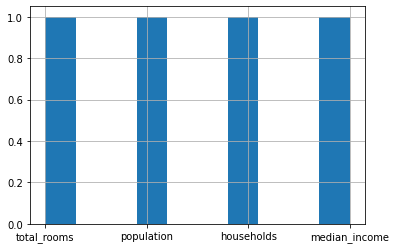

In [42]:
pd.Series(selected_feat).hist()